In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import json

In [2]:
UBQ_crystal = md.load('./1UBQ.pdb')

UBQ_alpha_rank1 = md.load('./1UBQ/relaxed_model_1_pred_0.pdb')
UBQ_alpha_rank2 = md.load('./1UBQ/relaxed_model_2_pred_0.pdb')
UBQ_alpha_rank3 = md.load('./1UBQ/relaxed_model_3_pred_0.pdb')
UBQ_alpha_rank4 = md.load('./1UBQ/relaxed_model_4_pred_0.pdb')
UBQ_alpha_rank5 = md.load('./1UBQ/relaxed_model_5_pred_0.pdb')

UBQ_colab_rank1 = md.load('./colabfold_use_amber/test1UBQ_7686d_relaxed_rank_1_model_4.pdb')
UBQ_colab_rank2 = md.load('./colabfold_use_amber/test1UBQ_7686d_relaxed_rank_2_model_3.pdb')
UBQ_colab_rank3 = md.load('./colabfold_use_amber/test1UBQ_7686d_relaxed_rank_3_model_2.pdb')
UBQ_colab_rank4 = md.load('./colabfold_use_amber/test1UBQ_7686d_relaxed_rank_4_model_1.pdb')
UBQ_colab_rank5 = md.load('./colabfold_use_amber/test1UBQ_7686d_relaxed_rank_5_model_5.pdb')

# RMSD calculation for backbone and sidechain atoms

## 1. Alphafold

In [3]:
rmsd_backbone_alpha = []

In [4]:
crystal_bb = UBQ_crystal.topology.select("backbone or sidechain")

In [5]:
print(len(crystal_bb))

602


In [6]:
alpha_bb_1 = UBQ_alpha_rank1.topology.select("backbone or (sidechain and not type H)")
alpha_bb_2 = UBQ_alpha_rank2.topology.select("backbone or (sidechain and not type H)")
alpha_bb_3 = UBQ_alpha_rank3.topology.select("backbone or (sidechain and not type H)")
alpha_bb_4 = UBQ_alpha_rank4.topology.select("backbone or (sidechain and not type H)")
alpha_bb_5 = UBQ_alpha_rank5.topology.select("backbone or (sidechain and not type H)")

In [7]:
print(len(alpha_bb_1))

602


In [8]:
crystal_bb = UBQ_crystal.atom_slice(crystal_bb)

In [9]:
alpha_bb_rank1 = UBQ_alpha_rank1.atom_slice(alpha_bb_1)
alpha_bb_rank2 = UBQ_alpha_rank2.atom_slice(alpha_bb_2)
alpha_bb_rank3 = UBQ_alpha_rank3.atom_slice(alpha_bb_3)
alpha_bb_rank4 = UBQ_alpha_rank4.atom_slice(alpha_bb_4)
alpha_bb_rank5 = UBQ_alpha_rank5.atom_slice(alpha_bb_5)

In [10]:
traj_aligned_1= alpha_bb_rank1.superpose(crystal_bb,0)
rmsd_alpha1_crystal = md.rmsd(traj_aligned_1, crystal_bb,0)
print(rmsd_alpha1_crystal)
rmsd_backbone_alpha.append(rmsd_alpha1_crystal)

[0.21160647]


In [11]:
traj_aligned_2= alpha_bb_rank2.superpose(crystal_bb,0)
rmsd_alpha2_crystal = md.rmsd(traj_aligned_2, crystal_bb,0)
print(rmsd_alpha2_crystal)
rmsd_backbone_alpha.append(rmsd_alpha2_crystal)

[0.2128238]


In [12]:
traj_aligned_3= alpha_bb_rank3.superpose(crystal_bb,0)
rmsd_alpha3_crystal = md.rmsd(traj_aligned_3, crystal_bb,0)
print(rmsd_alpha3_crystal)
rmsd_backbone_alpha.append(rmsd_alpha3_crystal)

[0.20580712]


In [13]:
traj_aligned_4= alpha_bb_rank4.superpose(crystal_bb,0)
rmsd_alpha4_crystal = md.rmsd(traj_aligned_4, crystal_bb,0)
print(rmsd_alpha4_crystal)
rmsd_backbone_alpha.append(rmsd_alpha4_crystal)

[0.2174162]


In [14]:
traj_aligned_5= alpha_bb_rank5.superpose(crystal_bb,0)
rmsd_alpha5_crystal = md.rmsd(traj_aligned_5, crystal_bb,0)
print(rmsd_alpha5_crystal)
rmsd_backbone_alpha.append(rmsd_alpha5_crystal)

[0.2145603]


In [15]:
print(rmsd_backbone_alpha)

[array([0.21160647], dtype=float32), array([0.2128238], dtype=float32), array([0.20580712], dtype=float32), array([0.2174162], dtype=float32), array([0.2145603], dtype=float32)]


In [16]:
rmsd_backbone_alpha = np.array(rmsd_backbone_alpha)
print(rmsd_backbone_alpha)

[[0.21160647]
 [0.2128238 ]
 [0.20580712]
 [0.2174162 ]
 [0.2145603 ]]


In [17]:
print(type(rmsd_backbone_alpha))
print(rmsd_backbone_alpha.shape)

<class 'numpy.ndarray'>
(5, 1)


## 2. Colabfold

In [18]:
rmsd_backbone_colab = []

In [19]:
crystal_bb = UBQ_crystal.topology.select("backbone or sidechain")

In [20]:
print(len(crystal_bb))

602


In [21]:
colab_bb_1 = UBQ_colab_rank1.topology.select("backbone or (sidechain and not type H)")
colab_bb_2 = UBQ_colab_rank2.topology.select("backbone or (sidechain and not type H)")
colab_bb_3 = UBQ_colab_rank3.topology.select("backbone or (sidechain and not type H)")
colab_bb_4 = UBQ_colab_rank4.topology.select("backbone or (sidechain and not type H)")
colab_bb_5 = UBQ_colab_rank5.topology.select("backbone or (sidechain and not type H)")

In [22]:
print(len(colab_bb_1))

602


In [23]:
crystal_bb = UBQ_crystal.atom_slice(crystal_bb)

In [24]:
colab_bb_rank1 = UBQ_colab_rank1.atom_slice(colab_bb_1)
colab_bb_rank2 = UBQ_colab_rank2.atom_slice(colab_bb_2)
colab_bb_rank3 = UBQ_colab_rank3.atom_slice(colab_bb_3)
colab_bb_rank4 = UBQ_colab_rank4.atom_slice(colab_bb_4)
colab_bb_rank5 = UBQ_colab_rank5.atom_slice(colab_bb_5)

In [25]:
traj_aligned_1= colab_bb_rank1.superpose(crystal_bb,0)
rmsd_colab1_crystal = md.rmsd(traj_aligned_1, crystal_bb,0)
print(rmsd_colab1_crystal)
rmsd_backbone_colab.append(rmsd_alpha1_crystal)

[0.21578069]


In [26]:
traj_aligned_2= colab_bb_rank2.superpose(crystal_bb,0)
rmsd_colab2_crystal = md.rmsd(traj_aligned_2, crystal_bb,0)
print(rmsd_colab2_crystal)
rmsd_backbone_colab.append(rmsd_colab2_crystal)

[0.2117808]


In [27]:
traj_aligned_3= colab_bb_rank3.superpose(crystal_bb,0)
rmsd_colab3_crystal = md.rmsd(traj_aligned_3, crystal_bb,0)
print(rmsd_colab3_crystal)
rmsd_backbone_colab.append(rmsd_colab3_crystal)

[0.21480352]


In [28]:
traj_aligned_4= colab_bb_rank4.superpose(crystal_bb,0)
rmsd_colab4_crystal = md.rmsd(traj_aligned_4, crystal_bb,0)
print(rmsd_colab4_crystal)
rmsd_backbone_colab.append(rmsd_colab4_crystal)

[0.20926541]


In [29]:
traj_aligned_5= colab_bb_rank5.superpose(crystal_bb,0)
rmsd_colab5_crystal = md.rmsd(traj_aligned_5, crystal_bb,0)
print(rmsd_colab5_crystal)
rmsd_backbone_colab.append(rmsd_colab5_crystal)

[0.2097421]


In [30]:
print(rmsd_backbone_colab)

[array([0.21160647], dtype=float32), array([0.2117808], dtype=float32), array([0.21480352], dtype=float32), array([0.20926541], dtype=float32), array([0.2097421], dtype=float32)]


In [31]:
rmsd_backbone_colab = np.array(rmsd_backbone_colab)
print(rmsd_backbone_colab)

[[0.21160647]
 [0.2117808 ]
 [0.21480352]
 [0.20926541]
 [0.2097421 ]]


In [32]:
print(type(rmsd_backbone_colab))
print(rmsd_backbone_colab.shape)

<class 'numpy.ndarray'>
(5, 1)


# RMSD calculation for Alpha-carbon atoms

## 1. Alphafold

In [33]:
rmsd_calpha_alpha = []

In [34]:
crystal_ca = UBQ_crystal.topology.select("name CA")

In [35]:
alpha_ca_1 = UBQ_alpha_rank1.topology.select("name CA")
alpha_ca_2 = UBQ_alpha_rank2.topology.select("name CA")
alpha_ca_3 = UBQ_alpha_rank3.topology.select("name CA")
alpha_ca_4 = UBQ_alpha_rank4.topology.select("name CA")
alpha_ca_5 = UBQ_alpha_rank5.topology.select("name CA")

In [36]:
crystal_ca = UBQ_crystal.atom_slice(crystal_ca)

In [37]:
alpha_ca_rank1 = UBQ_alpha_rank1.atom_slice(alpha_ca_1)
alpha_ca_rank2 = UBQ_alpha_rank2.atom_slice(alpha_ca_2)
alpha_ca_rank3 = UBQ_alpha_rank3.atom_slice(alpha_ca_3)
alpha_ca_rank4 = UBQ_alpha_rank4.atom_slice(alpha_ca_4)
alpha_ca_rank5 = UBQ_alpha_rank5.atom_slice(alpha_ca_5)

In [38]:
traj_aligned_1= alpha_ca_rank1.superpose(crystal_ca,0)
rmsd_alpha1_crystal = md.rmsd(traj_aligned_1, crystal_ca,0)
print(rmsd_alpha1_crystal)
rmsd_calpha_alpha.append(rmsd_alpha1_crystal)

[0.08174562]


In [39]:
traj_aligned_2= alpha_ca_rank2.superpose(crystal_ca,0)
rmsd_alpha2_crystal = md.rmsd(traj_aligned_2, crystal_ca,0)
print(rmsd_alpha2_crystal)
rmsd_calpha_alpha.append(rmsd_alpha2_crystal)

[0.08168051]


In [40]:
traj_aligned_3= alpha_ca_rank3.superpose(crystal_ca,0)
rmsd_alpha3_crystal = md.rmsd(traj_aligned_3, crystal_ca,0)
print(rmsd_alpha3_crystal)
rmsd_calpha_alpha.append(rmsd_alpha3_crystal)

[0.06960219]


In [41]:
traj_aligned_4= alpha_ca_rank4.superpose(crystal_ca,0)
rmsd_alpha4_crystal = md.rmsd(traj_aligned_4, crystal_ca,0)
print(rmsd_alpha4_crystal)
rmsd_calpha_alpha.append(rmsd_alpha4_crystal)

[0.08023842]


In [42]:
traj_aligned_5= alpha_ca_rank5.superpose(crystal_ca,0)
rmsd_alpha5_crystal = md.rmsd(traj_aligned_5, crystal_ca,0)
print(rmsd_alpha5_crystal)
rmsd_calpha_alpha.append(rmsd_alpha5_crystal)

[0.08162764]


In [43]:
rmsd_calpha_alpha = np.array(rmsd_calpha_alpha)
print(rmsd_calpha_alpha)

[[0.08174562]
 [0.08168051]
 [0.06960219]
 [0.08023842]
 [0.08162764]]


## 2. Colabfold

In [44]:
rmsd_calpha_colab = []

In [45]:
crystal_ca = UBQ_crystal.topology.select("name CA")

In [46]:
colab_ca_1 = UBQ_colab_rank1.topology.select("name CA")
colab_ca_2 = UBQ_colab_rank2.topology.select("name CA")
colab_ca_3 = UBQ_colab_rank3.topology.select("name CA")
colab_ca_4 = UBQ_colab_rank4.topology.select("name CA")
colab_ca_5 = UBQ_colab_rank5.topology.select("name CA")

In [47]:
crystal_ca = UBQ_crystal.atom_slice(crystal_ca)

In [48]:
colab_ca_rank1 = UBQ_colab_rank1.atom_slice(colab_ca_1)
colab_ca_rank2 = UBQ_colab_rank2.atom_slice(colab_ca_2)
colab_ca_rank3 = UBQ_colab_rank3.atom_slice(colab_ca_3)
colab_ca_rank4 = UBQ_colab_rank4.atom_slice(colab_ca_4)
colab_ca_rank5 = UBQ_colab_rank5.atom_slice(colab_ca_5)

In [49]:
traj_aligned_1= colab_ca_rank1.superpose(crystal_ca,0)
rmsd_colab1_crystal = md.rmsd(traj_aligned_1, crystal_ca,0)
print(rmsd_colab1_crystal)
rmsd_calpha_colab.append(rmsd_colab1_crystal)

[0.08388032]


In [50]:
traj_aligned_2= colab_ca_rank2.superpose(crystal_ca,0)
rmsd_colab2_crystal = md.rmsd(traj_aligned_2, crystal_ca,0)
print(rmsd_colab2_crystal)
rmsd_calpha_colab.append(rmsd_colab2_crystal)

[0.07865389]


In [51]:
traj_aligned_3= colab_ca_rank3.superpose(crystal_ca,0)
rmsd_colab3_crystal = md.rmsd(traj_aligned_3, crystal_ca,0)
print(rmsd_colab3_crystal)
rmsd_calpha_colab.append(rmsd_colab3_crystal)

[0.08956062]


In [52]:
traj_aligned_4= colab_ca_rank4.superpose(crystal_ca,0)
rmsd_colab4_crystal = md.rmsd(traj_aligned_4, crystal_ca,0)
print(rmsd_colab4_crystal)
rmsd_calpha_colab.append(rmsd_colab4_crystal)

[0.07849803]


In [53]:
traj_aligned_5= colab_ca_rank5.superpose(crystal_ca,0)
rmsd_colab5_crystal = md.rmsd(traj_aligned_5, crystal_ca,0)
print(rmsd_colab5_crystal)
rmsd_calpha_colab.append(rmsd_colab5_crystal)

[0.07452516]


In [54]:
rmsd_calpha_colab = np.array(rmsd_calpha_colab)
print(rmsd_calpha_colab)

[[0.08388032]
 [0.07865389]
 [0.08956062]
 [0.07849803]
 [0.07452516]]


# RMSD plots

In [55]:
print(rmsd_backbone_alpha)

[[0.21160647]
 [0.2128238 ]
 [0.20580712]
 [0.2174162 ]
 [0.2145603 ]]


In [56]:
print(rmsd_calpha_alpha)

[[0.08174562]
 [0.08168051]
 [0.06960219]
 [0.08023842]
 [0.08162764]]


In [57]:
print(rmsd_backbone_colab)

[[0.21160647]
 [0.2117808 ]
 [0.21480352]
 [0.20926541]
 [0.2097421 ]]


In [58]:
print(rmsd_calpha_colab)

[[0.08388032]
 [0.07865389]
 [0.08956062]
 [0.07849803]
 [0.07452516]]


In [59]:
labels_alpha = []
labels_colab = []
colors = []

In [60]:
for i in range(5):
    labels_alpha.append(f'alpha{i+1}')
    labels_colab.append(f'colab{i+1}')

In [61]:
colors.append('b')
colors.append('g')
colors.append('r')
colors.append('c')
colors.append('m')
colors.append('v')

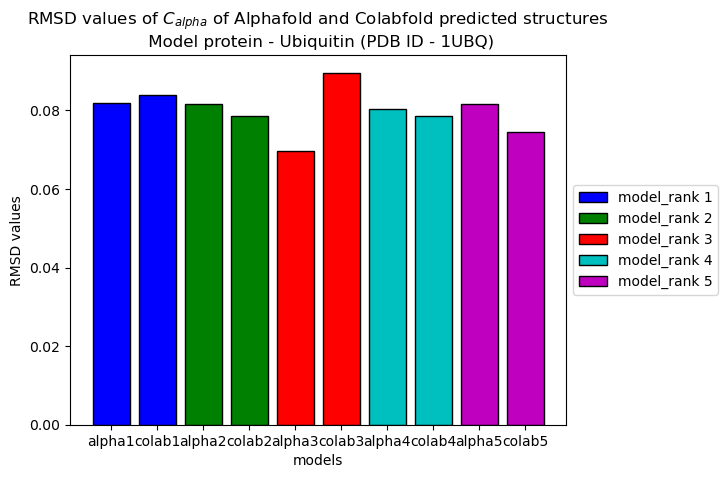

In [62]:
for i in range(5):
    plt.bar(labels_alpha[i], rmsd_calpha_alpha[i], width=0.8, color=colors[i], edgecolor='black', align = 'center', label=f'model_rank {i+1}')
    plt.bar(labels_colab[i], rmsd_calpha_colab[i], width=0.8, color=colors[i], edgecolor='black', align = 'center')
    plt.title('RMSD values of $C_{alpha}$ of Alphafold and Colabfold predicted structures \n Model protein - Ubiquitin (PDB ID - 1UBQ)')
    plt.xlabel('models')
    plt.ylabel('RMSD values')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
plt.savefig('./../figures/RMSD-calpha.png')

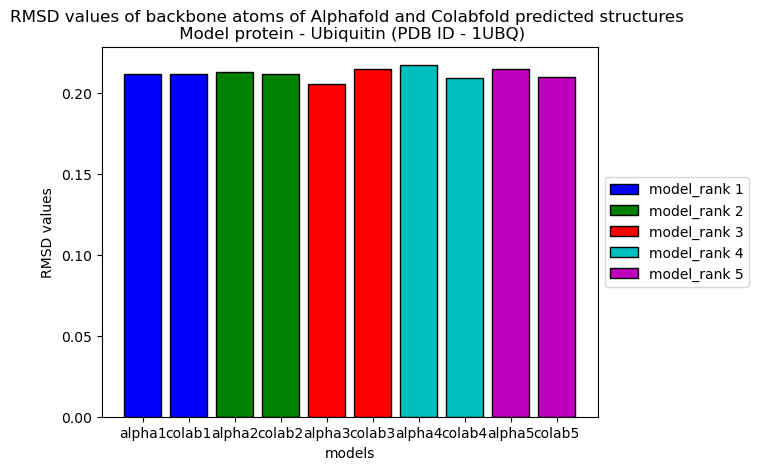

In [63]:
for i in range(5):
    plt.bar(labels_alpha[i], rmsd_backbone_alpha[i], width=0.8, color=colors[i], edgecolor='black', align = 'center', label=f'model_rank {i+1}' )
    plt.bar(labels_colab[i], rmsd_backbone_colab[i], width=0.8, color=colors[i], edgecolor='black', align = 'center' )
    plt.title('RMSD values of backbone atoms of Alphafold and Colabfold predicted structures \n Model protein - Ubiquitin (PDB ID - 1UBQ)')
    plt.xlabel('models')
    plt.ylabel('RMSD values')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
plt.savefig('./../figures/RMSD-backbone.png')

## Loading json files from colabfold predicted structures

In [64]:
json_path_Colab_1 = './colabfold_use_amber/test1UBQ_7686d_unrelaxed_rank_1_model_4_scores.json'
json_path_Colab_2 = './colabfold_use_amber/test1UBQ_7686d_unrelaxed_rank_2_model_3_scores.json'
json_path_Colab_3 = './colabfold_use_amber/test1UBQ_7686d_unrelaxed_rank_3_model_2_scores.json'
json_path_Colab_4 = './colabfold_use_amber/test1UBQ_7686d_unrelaxed_rank_4_model_1_scores.json'
json_path_Colab_5 = './colabfold_use_amber/test1UBQ_7686d_unrelaxed_rank_5_model_5_scores.json'

In [65]:
json_Colab_1 = json.load(open(json_path_Colab_1))
json_Colab_2 = json.load(open(json_path_Colab_2))
json_Colab_3 = json.load(open(json_path_Colab_3))
json_Colab_4 = json.load(open(json_path_Colab_4))
json_Colab_5 = json.load(open(json_path_Colab_5))

In [66]:
plddt_Colab_1 = np.mean(json_Colab_1['plddt'])
plddt_Colab_2 = np.mean(json_Colab_2['plddt'])
plddt_Colab_3 = np.mean(json_Colab_3['plddt'])
plddt_Colab_4 = np.mean(json_Colab_4['plddt'])
plddt_Colab_5 = np.mean(json_Colab_5['plddt'])

In [67]:
print(plddt_Colab_1)

95.97644736842105


In [68]:
rmsd_colabfold_all = []
rmsd_colabfold_all.append(rmsd_backbone_colab)
rmsd_colabfold_all.append(rmsd_calpha_colab)

In [69]:
plddt_colabfold = []
plddt_colabfold.append(plddt_Colab_1)
plddt_colabfold.append(plddt_Colab_2)
plddt_colabfold.append(plddt_Colab_3)
plddt_colabfold.append(plddt_Colab_4)
plddt_colabfold.append(plddt_Colab_5)

In [70]:
print(plddt_colabfold)

[95.97644736842105, 95.3894736842105, 95.24381578947369, 95.1582894736842, 93.58]


In [71]:
plddt_ranking_colab = [1, 2, 3, 4 ,5]

## loading pickle files from alphafold predicted structures

In [72]:
pkl_path_1 = './1UBQ/result_model_1_pred_0.pkl'
pkl_path_2 = './1UBQ/result_model_2_pred_0.pkl'
pkl_path_3 = './1UBQ/result_model_3_pred_0.pkl'
pkl_path_4 = './1UBQ/result_model_4_pred_0.pkl'
pkl_path_5 = './1UBQ/result_model_5_pred_0.pkl'

In [73]:
pkl_alphafold_1 = np.load(pkl_path_1, allow_pickle=True)
pkl_alphafold_2 = np.load(pkl_path_2, allow_pickle=True)
pkl_alphafold_3 = np.load(pkl_path_3, allow_pickle=True)
pkl_alphafold_4 = np.load(pkl_path_4, allow_pickle=True)
pkl_alphafold_5 = np.load(pkl_path_5, allow_pickle=True)

In [74]:
plddt_alphafold_1 = pkl_alphafold_1['ranking_confidence']
plddt_alphafold_2 = pkl_alphafold_2['ranking_confidence']
plddt_alphafold_3 = pkl_alphafold_3['ranking_confidence']
plddt_alphafold_4 = pkl_alphafold_4['ranking_confidence']
plddt_alphafold_5 = pkl_alphafold_5['ranking_confidence']

In [75]:
print(plddt_alphafold_1)
print(plddt_alphafold_2)
print(plddt_alphafold_1)

94.80585672720434
94.99186526152437
94.80585672720434


In [76]:
plddt_alphafold = []
plddt_alphafold.append(plddt_alphafold_1)
plddt_alphafold.append(plddt_alphafold_2)
plddt_alphafold.append(plddt_alphafold_3)
plddt_alphafold.append(plddt_alphafold_4)
plddt_alphafold.append(plddt_alphafold_5)

In [77]:
print(plddt_alphafold)

[94.80585672720434, 94.99186526152437, 94.57733210953414, 95.1538189754999, 94.4661140618518]


In [78]:
plddt_ranking_alpha = [4,5,3,2,1]

In [79]:
rmsd_alphafold_all = []
rmsd_alphafold_all.append(rmsd_backbone_alpha)
rmsd_alphafold_all.append(rmsd_calpha_alpha)

# Scatter plots for plddt values against RMSD values

## 1. Alphafold

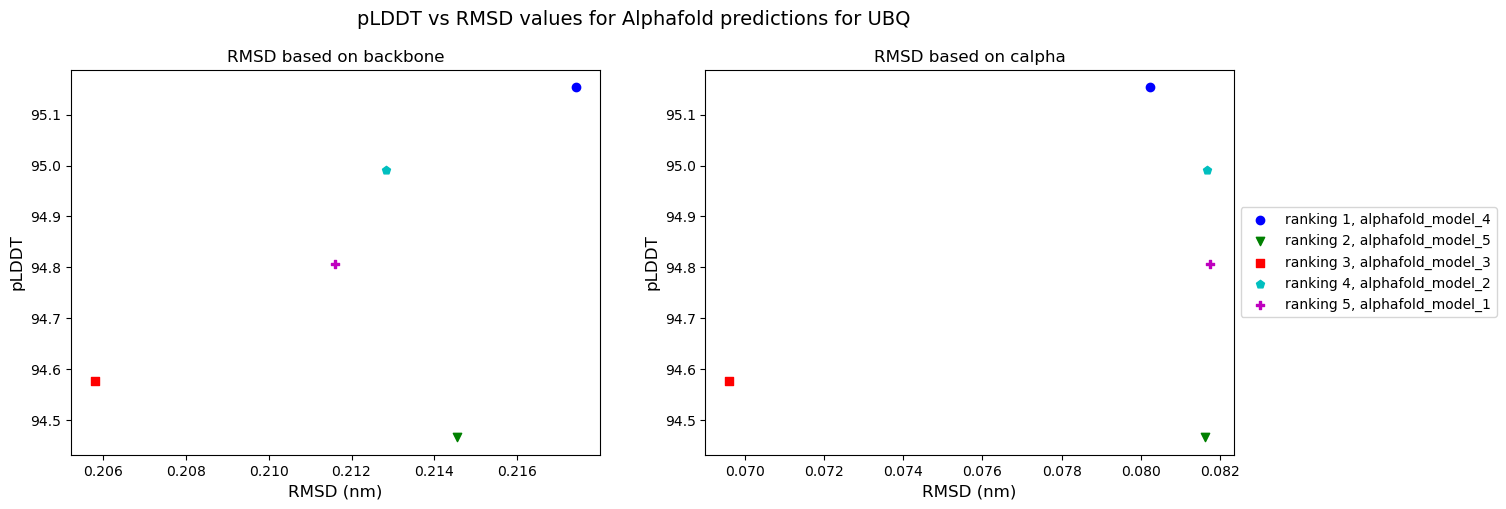

In [80]:
fig,axes = plt.subplots(1, 2, figsize=(15, 5))

markers = ['o', 'v', 's', 'p', 'P', '*', 'h', 'H', 'X', 'D', 'd']

segment_properties = ['backbone', 'calpha', 'sidechains']


for i in range(2):
    for j in range(5):
        r=plddt_ranking_alpha[j]-1
        #print(r)
        axes[i].scatter(rmsd_alphafold_all[i][r], plddt_alphafold[r], color=colors[j], marker=markers[j],
        label='ranking {}'.format(j+1)+', alphafold_model_{}'.format(r+1))
        axes[i].set_xlabel('RMSD (nm)', fontsize=12)
        axes[i].set_ylabel('pLDDT', fontsize=12)
        axes[i].set_title('RMSD based on ' + segment_properties[i], fontsize=12)
        
        

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.suptitle('pLDDT vs RMSD values for Alphafold predictions for UBQ', fontsize=14,x=0.5,y=1)
plt.savefig('./../figures/pLDDT_vs_RMSD_alpha.png')

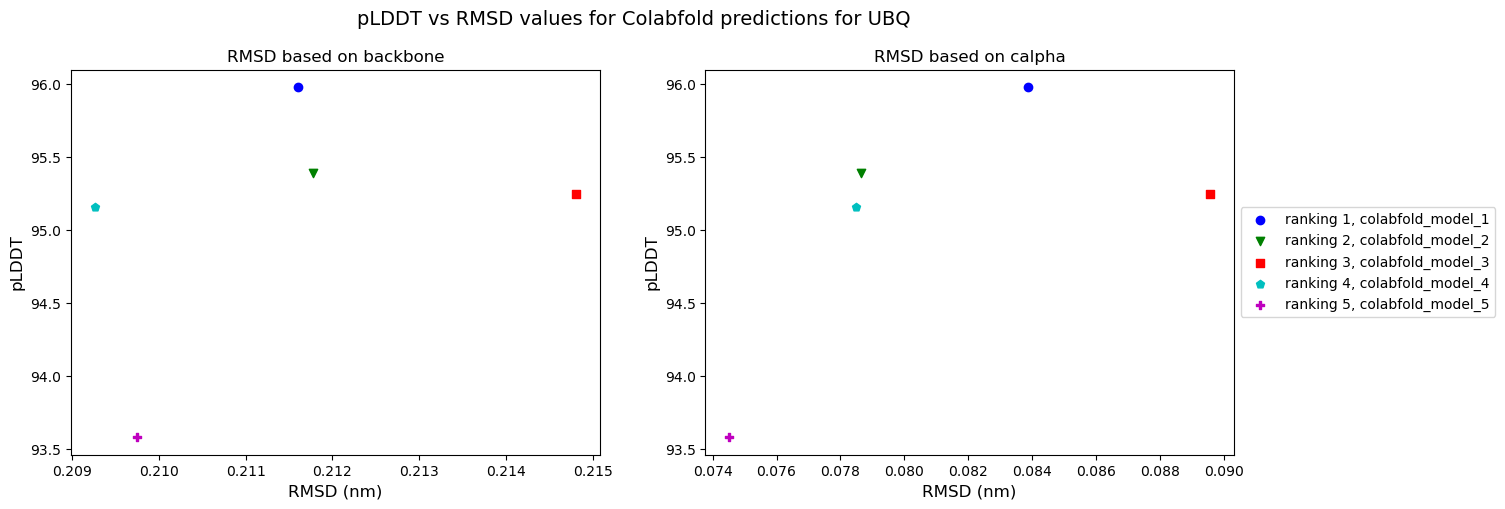

In [81]:
fig,axes = plt.subplots(1, 2, figsize=(15, 5))

markers = ['o', 'v', 's', 'p', 'P', '*', 'h', 'H', 'X', 'D', 'd']

segment_properties = ['backbone', 'calpha', 'sidechains']



for i in range(2):
    for j in range(5):
        r=plddt_ranking_colab[j]-1
        #print(r)
        axes[i].scatter(rmsd_colabfold_all[i][r], plddt_colabfold[r], color=colors[j], marker=markers[j],
        label='ranking {}'.format(j+1)+', colabfold_model_{}'.format(r+1))
        axes[i].set_xlabel('RMSD (nm)', fontsize=12)
        axes[i].set_ylabel('pLDDT', fontsize=12)
        axes[i].set_title('RMSD based on ' + segment_properties[i], fontsize=12)
        
        

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.suptitle('pLDDT vs RMSD values for Colabfold predictions for UBQ', fontsize=14,x=0.5,y=1)
plt.savefig('./../figures/pLDDT_vs_RMSD_colab.png')

# Observing which method gives best output on unrelaxed structure

## Loading Rosettafold files

In [82]:
UBQ_rose = md.load('./rosettafold_outputs/test_7686d/pred.pdb')

In [83]:
rose_bb = UBQ_rose.topology.select("backbone or (sidechain and not type H)")
rose_bb_slice = UBQ_rose.atom_slice(rose_bb)

In [84]:
rose_calpha = UBQ_rose.topology.select("name CA")
rose_calpha_slice = UBQ_rose.atom_slice(rose_calpha)

In [85]:
rose_sdch = UBQ_rose.topology.select("(name != CA) and (name != O)")
rose_sdch_slice = UBQ_rose.atom_slice(rose_sdch)

In [86]:
print(rose_sdch)

[  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178
 180 182 184 186 188 190 192 194 196 198 200 202 204 206 208 210 212 214
 216 218 220 222 224 226 228 230 232 234 236 238 240 242 244 246 248 250
 252 254 256 258 260 262 264 266 268 270 272 274 276 278 280 282 284 286
 288 290 292 294 296 298 300 302]


In [ ]:
traj_align_bb_rose = rose_bb_slice.superpose(crystal_bb, 0)

In [ ]:
traj_align_calpha_rose = rose_calpha_slice.superpose(crystal_ca,0)